#### Import important libraries 

In [88]:
import pandas as pd
import time
from time import time
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import explained_variance_score
import seaborn as sns
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV, ParameterGrid


In [89]:
import warnings
warnings.filterwarnings('ignore')

#### Read the data set and set date column as index

In [90]:
df = pd.read_csv('IPODataFull.csv' ,encoding= 'unicode_escape')

# df.set_index(df['Date'], inplace = True)
# df.drop(columns = [ 'Date'], inplace = True)

In [91]:
df

,Symbol,DaysBetterThanSP,daysProfit,daysProfitGrouped,exactDiffernce,Year,Month,Day,dayOfWeek,closeDay0,...,usableCEOAge,usableCEOGender,usablePresidentAge,usablePresidentGender,FoundingDateGrouped,yearDifferenceGrouped,Profitable,Safe,HomeRunDay,HomeRun
0,A,122,249,200+,NaN,1999,11,18,3,28.6358,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,77.0,1
1,AAC,131,262,200+,232.0,2014,10,2,3,18.5000,...,40 - 49,male,Blank,Blank,2011 - present,Unknown,1,1,NaN,0
2,AAOI,125,262,200+,6054.0,2013,9,26,3,9.9600,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,NaN,0
3,AAP,128,261,200+,NaN,2001,11,29,3,13.9000,...,Blank,Blank,Blank,Blank,1901 - 1950,Unknown,1,0,NaN,0
4,AAT,123,127,100 - 149,181.0,2011,1,13,3,21.2500,...,Blank,Blank,Blank,Blank,2001 - 2010,Unknown,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,ZUMZ,139,261,200+,NaN,2005,5,6,4,12.4350,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,1,234.0,1
3758,ZUO,5,7,0 - 49,NaN,2018,4,12,3,20.0000,...,NaN,mostly_male,Unknown,Unknown,2001 - 2010,Unknown,0,0,NaN,0
3759,ZX,102,25,0 - 49,1035.0,2011,5,12,3,5.8500,...,Unknown,Unknown,Unknown,Unknown,2001 - 2010,Unknown,0,0,NaN,0
3760,ZYME,115,19,0 - 49,NaN,2017,4,28,4,13.0000,...,Unknown,Unknown,Unknown,Unknown,2001 - 2010,Unknown,0,0,NaN,0


In [92]:
# To see about data types and check null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Columns: 1664 entries, Symbol to HomeRun
dtypes: float64(1596), int64(9), object(59)
memory usage: 47.8+ MB


In [93]:
df.isnull().sum()

Symbol                      0
DaysBetterThanSP            0
daysProfit                  0
daysProfitGrouped           0
exactDiffernce           2194
                         ... 
yearDifferenceGrouped       0
Profitable                  0
Safe                        0
HomeRunDay               3501
HomeRun                     0
Length: 1664, dtype: int64

In [94]:
df.columns

Index(['Symbol', 'DaysBetterThanSP', 'daysProfit', 'daysProfitGrouped',
       'exactDiffernce', 'Year', 'Month', 'Day', 'dayOfWeek', 'closeDay0',
       ...
       'usableCEOAge', 'usableCEOGender', 'usablePresidentAge',
       'usablePresidentGender', 'FoundingDateGrouped', 'yearDifferenceGrouped',
       'Profitable', 'Safe', 'HomeRunDay', 'HomeRun'],
      dtype='object', length=1664)

In [95]:
df

,Symbol,DaysBetterThanSP,daysProfit,daysProfitGrouped,exactDiffernce,Year,Month,Day,dayOfWeek,closeDay0,...,usableCEOAge,usableCEOGender,usablePresidentAge,usablePresidentGender,FoundingDateGrouped,yearDifferenceGrouped,Profitable,Safe,HomeRunDay,HomeRun
0,A,122,249,200+,NaN,1999,11,18,3,28.6358,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,77.0,1
1,AAC,131,262,200+,232.0,2014,10,2,3,18.5000,...,40 - 49,male,Blank,Blank,2011 - present,Unknown,1,1,NaN,0
2,AAOI,125,262,200+,6054.0,2013,9,26,3,9.9600,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,NaN,0
3,AAP,128,261,200+,NaN,2001,11,29,3,13.9000,...,Blank,Blank,Blank,Blank,1901 - 1950,Unknown,1,0,NaN,0
4,AAT,123,127,100 - 149,181.0,2011,1,13,3,21.2500,...,Blank,Blank,Blank,Blank,2001 - 2010,Unknown,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,ZUMZ,139,261,200+,NaN,2005,5,6,4,12.4350,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,1,234.0,1
3758,ZUO,5,7,0 - 49,NaN,2018,4,12,3,20.0000,...,NaN,mostly_male,Unknown,Unknown,2001 - 2010,Unknown,0,0,NaN,0
3759,ZX,102,25,0 - 49,1035.0,2011,5,12,3,5.8500,...,Unknown,Unknown,Unknown,Unknown,2001 - 2010,Unknown,0,0,NaN,0
3760,ZYME,115,19,0 - 49,NaN,2017,4,28,4,13.0000,...,Unknown,Unknown,Unknown,Unknown,2001 - 2010,Unknown,0,0,NaN,0


In [96]:
df=df[['closeDay0','highDay0','openDay0','lowDay0','volumeDay0','USACompany','Revenue','netIncome','employees','YearFounded',"Industry",'MarketCap']]

In [97]:
df

,closeDay0,highDay0,openDay0,lowDay0,volumeDay0,USACompany,Revenue,netIncome,employees,YearFounded,Industry,MarketCap
0,28.6358,33.5207,27.3725,30.6572,59753154.0,Yes,$4.47B,$684.00M,13500,1999.0,Biotechnology: Laboratory Analytical Instruments,2.198323e+10
1,18.5000,20.1000,17.6000,20.0000,2799073.0,Yes,$317.64M,$-20.58M,2100,2014.0,Medical Specialities,2.707691e+08
2,9.9600,10.0900,9.3700,10.0000,948999.0,Yes,$382.33M,$73.95M,3054,1997.0,Semiconductors,5.844368e+08
3,13.9000,14.4667,13.3833,13.4000,371100.0,Yes,$9.37B,$475.51M,71000,1929.0,Other Specialty Stores,7.874971e+09
4,21.2500,22.0000,21.1800,21.5300,15536889.0,Yes,$311.68M,$29.08M,194,2010.0,Real Estate Investment Trusts,1.604956e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
3757,12.4350,12.5750,10.2500,10.2750,6793424.0,Yes,$927.40M,$26.80M,8900,1978.0,Clothing/Shoe/Accessory Stores,6.085133e+08
3758,20.0000,21.8500,19.1200,20.0000,13102419.0,Yes,$167.93M,$-47.16M,933,2007.0,NaN,2.132269e+09
3759,5.8500,6.2000,5.6000,6.0000,4987284.0,No,$418.90M,$1.34M,-,2008.0,Auto Parts:O.E.M.,6.711250e+07
3760,13.0000,14.2500,13.0000,13.5000,953887.0,No,$51.76M,$-10.41M,147,2003.0,Major Pharmaceuticals,3.068106e+08


In [98]:
USA=[]

for i in df['USACompany']:
    if i =='yes':
       USA.append(1)
    else:
        USA.append(0)
    
df['USACompany']=USA
        

In [99]:
df['employees']=df['employees'].replace({'-':0})

In [100]:
df['employees']=df['employees'].astype('float64')

In [101]:
df['employees']=df['employees'].replace({0:df['employees'].mean()})

In [102]:
df['Industry']=LabelEncoder().fit_transform(df['Industry'])

In [103]:
df['Revenue']=df['Revenue'].astype("str")
ren=[]
for i in df['Revenue']:
     ren.append(i.replace('.', '').replace('$', '').replace('B','0000000').replace('M','0000').replace(',','').replace('(','').replace(')',''))
ren
df['Revenue']=ren
df['Revenue']=df['Revenue'].replace('nan','0')
df['Revenue']=df['Revenue'].astype('float64')
df['Revenue']=df['Revenue'].replace({0:df['Revenue'].mean()})

In [104]:
df["Revenue"]

0       4.470000e+09
1       3.176400e+08
2       3.823300e+08
3       9.370000e+09
4       3.116800e+08
            ...     
3757    9.274000e+08
3758    1.679300e+08
3759    4.189000e+08
3760    5.176000e+07
3761    6.349867e+10
Name: Revenue, Length: 3762, dtype: float64

In [105]:
df['netIncome']=df['netIncome'].astype("str")
ren=[]
for i in df['netIncome']:
     ren.append(i.replace('.', '').replace('$', '').replace('B','0000000').replace('M','0000').replace(',','').replace('(','').replace(')','').replace('-',''))
ren
df['netIncome']=ren
df['netIncome']=df['netIncome'].replace('nan','0')
df['netIncome']=df['netIncome'].astype('float64')
df['netIncome']=df['netIncome'].replace({0:df['netIncome'].mean()})

In [106]:
df["netIncome"]

0       684000000.0
1        20580000.0
2        73950000.0
3       475510000.0
4        29080000.0
           ...     
3757     26800000.0
3758     47160000.0
3759      1340000.0
3760     10410000.0
3761     32010000.0
Name: netIncome, Length: 3762, dtype: float64

In [107]:
df=df.fillna(0)

In [108]:
df['highDay0']=df['highDay0'].replace({0:df['highDay0'].mean()})
df['openDay0']=df['openDay0'].replace({0:df['openDay0'].mean()})
df['lowDay0']=df['lowDay0'].replace({0:df['lowDay0'].mean()})
df['volumeDay0']=df['volumeDay0'].replace({0:df['volumeDay0'].mean()})
df['employees']=df['employees'].replace({0:df['employees'].mean()})
df['YearFounded']=df['YearFounded'].replace({0:df['YearFounded'].mean()})

In [109]:
df.isnull().sum()

closeDay0      0
highDay0       0
openDay0       0
lowDay0        0
volumeDay0     0
USACompany     0
Revenue        0
netIncome      0
employees      0
YearFounded    0
Industry       0
MarketCap      0
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   closeDay0    3762 non-null   float64
 1   highDay0     3762 non-null   float64
 2   openDay0     3762 non-null   float64
 3   lowDay0      3762 non-null   float64
 4   volumeDay0   3762 non-null   float64
 5   USACompany   3762 non-null   int64  
 6   Revenue      3762 non-null   float64
 7   netIncome    3762 non-null   float64
 8   employees    3762 non-null   float64
 9   YearFounded  3762 non-null   float64
 10  Industry     3762 non-null   int64  
 11  MarketCap    3762 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 352.8 KB


In [111]:
df=df.astype("float64")

### Dataset Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

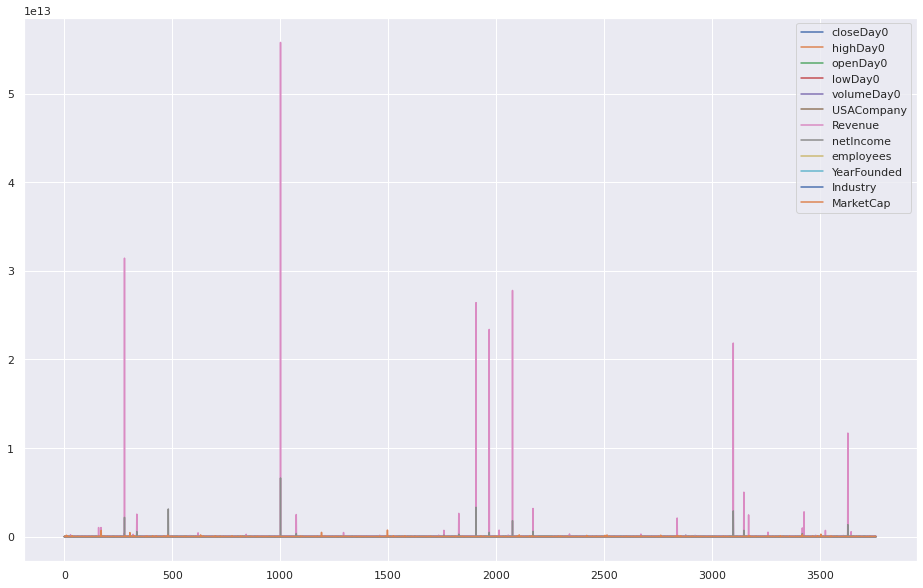

In [112]:
df.plot()
plt.show

### Correlation Between Dataset

In [113]:
# To see the correlation between dataset each columns
df.corr()

,closeDay0,highDay0,openDay0,lowDay0,volumeDay0,USACompany,Revenue,netIncome,employees,YearFounded,Industry,MarketCap
closeDay0,1.000000,0.999928,0.998163,0.979709,-0.000048,NaN,-0.001267,-0.001184,-0.006009,0.006453,-0.004003,-0.003932
highDay0,0.999928,1.000000,0.998559,0.981172,-0.000050,NaN,-0.001275,-0.001189,-0.006037,0.004473,-0.002685,-0.004020
openDay0,0.998163,0.998559,1.000000,0.989899,-0.000049,NaN,-0.001235,-0.001151,-0.005848,0.003782,-0.003016,-0.003931
lowDay0,0.979709,0.981172,0.989899,1.000000,0.000265,NaN,-0.001112,-0.001037,-0.005214,0.003216,-0.003776,-0.003511
volumeDay0,-0.000048,-0.000050,-0.000049,0.000265,1.000000,NaN,-0.000300,-0.000294,0.000667,-0.033390,0.020991,0.039218
USACompany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue,-0.001267,-0.001275,-0.001235,-0.001112,-0.000300,NaN,1.000000,0.889701,0.045123,0.002803,-0.013593,0.038605
netIncome,-0.001184,-0.001189,-0.001151,-0.001037,-0.000294,NaN,0.889701,1.000000,0.023153,0.001819,-0.010819,0.039130
employees,-0.006009,-0.006037,-0.005848,-0.005214,0.000667,NaN,0.045123,0.023153,1.000000,0.004004,-0.042268,0.394067
YearFounded,0.006453,0.004473,0.003782,0.003216,-0.033390,NaN,0.002803,0.001819,0.004004,1.000000,-0.443841,0.052010


In [114]:
corrMatrix=df.corr()

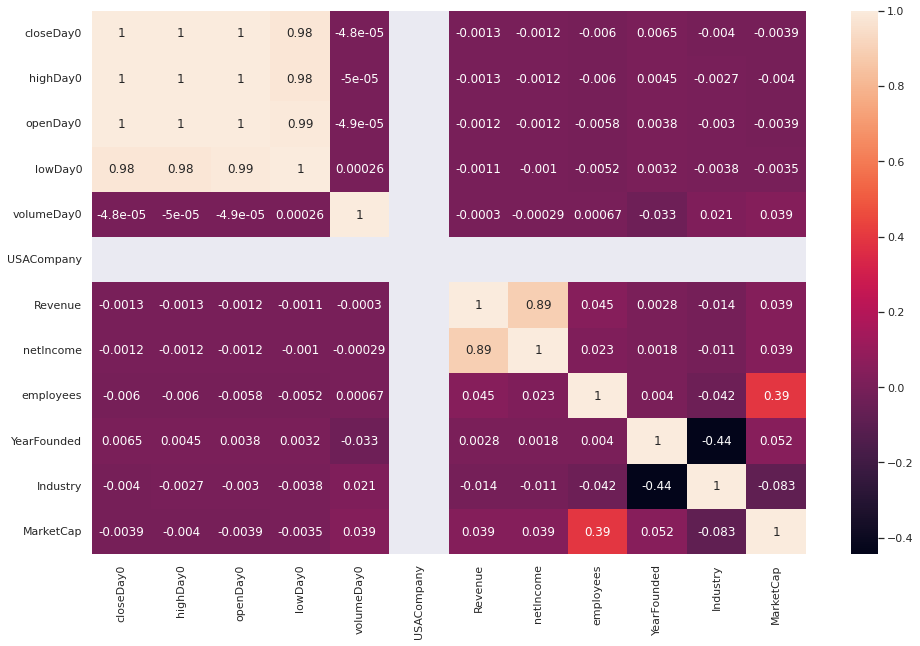

In [115]:
sns.heatmap(corrMatrix, annot=True)
sns.set(rc = {'figure.figsize':(16,10)})
plt.show()

In [137]:
abd=df['closeDay0']/df['openDay0']

In [138]:
df['gainDay0']=abd

In [139]:
df

,closeDay0,highDay0,openDay0,lowDay0,volumeDay0,USACompany,Revenue,netIncome,employees,YearFounded,Industry,MarketCap,gainDay0
0,28.6358,33.5207,27.3725,30.6572,59753154.0,0.0,4.470000e+09,684000000.0,13500.000000,1999.0,16.0,2.198323e+10,1.046152
1,18.5000,20.1000,17.6000,20.0000,2799073.0,0.0,3.176400e+08,20580000.0,2100.000000,2014.0,72.0,2.707691e+08,1.051136
2,9.9600,10.0900,9.3700,10.0000,948999.0,0.0,3.823300e+08,73950000.0,3054.000000,1997.0,117.0,5.844368e+08,1.062967
3,13.9000,14.4667,13.3833,13.4000,371100.0,0.0,9.370000e+09,475510000.0,71000.000000,1929.0,94.0,7.874971e+09,1.038608
4,21.2500,22.0000,21.1800,21.5300,15536889.0,0.0,3.116800e+08,29080000.0,194.000000,2010.0,111.0,1.604956e+09,1.003305
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,12.4350,12.5750,10.2500,10.2750,6793424.0,0.0,9.274000e+08,26800000.0,8900.000000,1978.0,24.0,6.085133e+08,1.213171
3758,20.0000,21.8500,19.1200,20.0000,13102419.0,0.0,1.679300e+08,47160000.0,933.000000,2007.0,132.0,2.132269e+09,1.046025
3759,5.8500,6.2000,5.6000,6.0000,4987284.0,0.0,4.189000e+08,1340000.0,7293.424463,2008.0,8.0,6.711250e+07,1.044643
3760,13.0000,14.2500,13.0000,13.5000,953887.0,0.0,5.176000e+07,10410000.0,147.000000,2003.0,68.0,3.068106e+08,1.000000


In [140]:
# Drop the SpotPrice column from the dataset  
# X=df[['highDay0','openDay0','lowDay0','volumeDay0']]
X=df.drop(columns=['gainDay0'])

In [141]:
y=df['gainDay0']

In [142]:
print(X.shape,y.shape)

(3762, 12) (3762,)


Here I scale the data between 0 to 1 by using minmax scaler

In [143]:
scale=StandardScaler()
scale.fit(X)
X=scale.transform(X)

In [144]:
X

array([[-0.02245472, -0.02334866, -0.02282515, ...,  0.51423756,
        -1.57745172,  0.65131387],
       [-0.02245487, -0.02334885, -0.02282531, ...,  0.60546883,
        -0.17788251, -0.16612423],
       [-0.02245499, -0.02334899, -0.02282544, ...,  0.50207339,
         0.94677131, -0.15431516],
       ...,
       [-0.02245506, -0.02334905, -0.0228255 , ...,  0.56897632,
        -1.77739018, -0.17379156],
       [-0.02245495, -0.02334893, -0.02282538, ...,  0.5385659 ,
        -0.27785174, -0.16476733],
       [-0.0224549 , -0.02334882, -0.02282534, ...,  0.56289424,
        -0.27785174, -0.1712024 ]])

### Train Test Split

In [145]:
# Split the data to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=0)


## Random Forest Regressor Model 

I have applied the firstly the random forest regressor model with default parameters which are n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None and this model with default parameter produce good result.


In [146]:
regr=RandomForestRegressor()
start = time()
regr.fit(X_train, y_train)
end=time()
train_time_random_forest_d =end-start

In [147]:
# Prediction against the test dataset 
predict=regr.predict(X_test)

In [148]:
# print(predict)

In [149]:
RandomForestRegressorDefaultPara=regr.score(X_test,y_test)
RandomForestRegressorDefaultParaVariance=explained_variance_score(predict,y_test)

In [150]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {regr.score(X_train, y_train) * 100:.2f}% and Test Score : {regr.score(X_test, y_test) * 100:.2f}% using Random Forest Regressor.')


Mean Absolute Error: 0.1011
Mean Squared Error: 0.3834
Root Mean Squared Error: 0.6192
(R^2) Score: -0.0679
Train Score : 85.59% and Test Score : -6.79% using Random Forest Regressor.


In [151]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [152]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


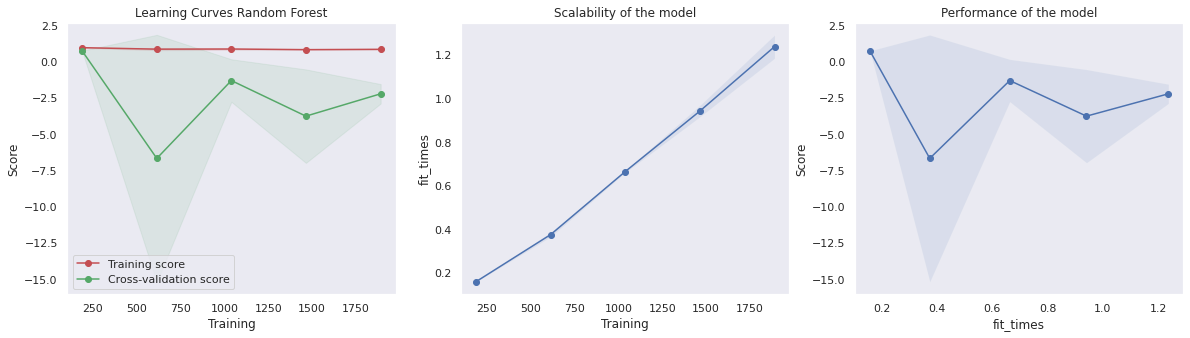

In [153]:
cv = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
title = "Learning Curves Random Forest"
plot_learning_curve(regr, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()

The result in which clear that the train score (accuray) is very good and test is also good
ans have aslo very low mean absolute error and root mean square error.

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

In [ ]:
cv_score = cross_val_score(regr, X_train, y_train, cv=3)
cv_score

In [ ]:
train_scores, valid_scores = validation_curve(regr, X_train, y_train, param_name="n_estimators", param_range=(30,50,60),cv=3)
print(train_scores)
print(valid_scores)
plt.plot(train_scores,label='Train Score')
plt.plot(valid_scores,label='Validation Score')
plt.title("Validation Curve with Random Forest Regressor")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.legend(title='Train vs Validation :')
plt.show()

In [ ]:
plt.boxplot(y_test) 
plt.show()

Box plot show that the mostly test data are in between 30 to 50.

In [ ]:
plt.boxplot(predict) 
plt.show()

Box plot show that the mostly predicted data are in between 30 to 50.

In [ ]:
# plot the graph to show the actual and predicted data
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
prediction.plot(kind='line',figsize=(16,8))
plt.plot(linestyle='-', linewidth='2', color='blue')
plt.plot(linestyle=':', linewidth='2', color='brown')
plt.show()

The result of this model are very satifying. In graph blue color show the actual data and brow show the predicted data. There are only some points where to see blue. It means predicted data very close to original one.

##  Decision Tree Regressor Model

I have applied the firstly the Decision Tree regressor model with tune and default mixture parameters which are criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0

In [ ]:
# Train the model
model = DecisionTreeRegressor(max_features='auto')
start=time()
model.fit(X_train, y_train)
end=time()
train_time_decision_tree =end-start
predict = model.predict(X_test)

In [ ]:
DecisionTree=model.score(X_test,y_test)
DecisionTreeVariance=explained_variance_score(predict,y_test)

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Decision Tree Regressor.')



In [ ]:

cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
title = "Learning Curves Decision Tree"
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()

In [ ]:
cv_score = cross_val_score(model, X_train, y_train, cv=3)
cv_score

In [ ]:
train_scores, valid_scores = validation_curve(model, X_train, y_train, param_name="criterion", param_range=("squared_error","friedman_mse","absolute_error"),cv=3)
print(train_scores)
print(valid_scores)
plt.plot(train_scores,label='Train Score')
plt.plot(valid_scores,label='Validation Score')
plt.title("Validation Curve with Decision Tree Regressor")
plt.xlabel("Criterion")
plt.ylabel("Score")
plt.legend(title='Train vs Validation :')
plt.show()

The result of the model increase a bit and perform better then the all default parameter.

In [ ]:
plt.boxplot(predict) 
plt.show()

In [ ]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
prediction.plot(kind='line',figsize=(16,8))
plt.plot(linestyle='-', linewidth='2', color='blue')
plt.plot(linestyle=':', linewidth='2', color='brown')
plt.show()


##  Gradient Boost Regressor

I have applied the gradient bosst regressor model with default and tune parameters which are loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0 and this model with default parameter produce a bit better then previous models result.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
start=time()
GB=GradientBoostingRegressor(n_estimators=40, max_depth=6, loss='ls',learning_rate=0.1).fit(X_train, y_train)
end=time()
train_time_GB =end-start

In [ ]:
predict = GB.predict(X_test)

In [ ]:
GradientBR=GB.score(X_test,y_test)
GradientBR_Variance=explained_variance_score(predict,y_test)

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {GB.score(X_train, y_train) * 100:.2f}% and Test Score : {GB.score(X_test, y_test) * 100:.2f}% using Gradient Boost Regressor.')



In [ ]:
cv = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
title = "Learning Curves GB"
plot_learning_curve(GB, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()

In [ ]:
cv_score = cross_val_score(GB, X_train, y_train, cv=3)
cv_score

In [ ]:
train_scores, valid_scores = validation_curve(GB, X_train, y_train, param_name="n_estimators", param_range=(30,40,50),cv=3)
print(train_scores)
print(valid_scores)
plt.plot(train_scores,label='Train Score')
plt.plot(valid_scores,label='Validation Score')
plt.title("Validation Curve with Gradient Boost Regressor")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.legend(title='Train vs Validation :')
plt.show()

In [ ]:
plt.boxplot(predict) 
plt.show()

In [ ]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
prediction.plot(kind='line',figsize=(16,8))
plt.plot(linestyle='-', linewidth='2', color='blue')
plt.plot(linestyle=':', linewidth='2', color='brown')
plt.show()

## XGBoost Regressor Model

XGBoost is very fast and work on greedy algorithm. It train in very less time and produce good result.

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=42)

start=time()
xgb_model.fit(X_train, y_train)
end=time()
train_time_XGBoost =end-start


In [ ]:
predict = xgb_model.predict(X_test)

In [ ]:
XGBoost=xgb_model.score(X_test,y_test)
XGBoost_Variance=explained_variance_score(predict,y_test)

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {xgb_model.score(X_train, y_train) * 100:.2f}% and Test Score : {xgb_model.score(X_test, y_test) * 100:.2f}% using XGBoost Regressor.')



In [ ]:
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
title = "Learning Curves XGBoost Regressor"
plot_learning_curve(xgb_model, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()

In [ ]:
cv_score = cross_val_score(xgb_model, X_train, y_train, cv=3)
cv_score

In [ ]:
train_scores, valid_scores = validation_curve(xgb_model, X_train, y_train, param_name="max_depth", param_range=(2,4,6),cv=3)
print(train_scores)
print(valid_scores)
plt.plot(train_scores,label='Train Score')
plt.plot(valid_scores,label='Validation Score')
plt.title("Validation Curve with XGBoost Regressor Tune Parameter")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.legend(title='Train vs Validation :')
plt.show()

In [ ]:
plt.boxplot(predict) 
plt.show()

In [ ]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
prediction.plot(kind='line',figsize=(16,8))
plt.plot(linestyle='-', linewidth='2', color='blue')
plt.plot(linestyle=':', linewidth='2', color='brown')
plt.show()


## AdaBoost Regressor Model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
start = time()
ada=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential').fit(X_train, y_train)
end=time()
train_time_ada=end-start
predict=ada.predict(X_test)

In [ ]:
AdaBoost=ada.score(X_test,y_test)
AdaBoost_Variance=explained_variance_score(predict,y_test)

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {ada.score(X_train, y_train) * 100:.2f}% and Test Score : {ada.score(X_test, y_test) * 100:.2f}% using AdaBoost Model')


In [ ]:
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
title = "Learning Curves Ada"
plot_learning_curve(ada, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()

In [ ]:
cv_score = cross_val_score(ada, X_train, y_train, cv=3)
cv_score

In [ ]:
train_scores, valid_scores = validation_curve(ada, X_train, y_train, param_name="n_estimators", param_range=(60,100,150),cv=3)
print(train_scores)
print(valid_scores)
plt.plot(train_scores,label='Train Score')
plt.plot(valid_scores,label='Validation Score')
plt.title("Validation Curve with AdaBoost Regressor")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.legend(title='Train vs Validation :')
plt.show()

In [ ]:
plt.boxplot(predict) 
plt.show()

In [ ]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
prediction.plot(kind='line',figsize=(16,8))
plt.plot(linestyle='-', linewidth='2', color='blue')
plt.plot(linestyle=':', linewidth='2', color='brown')
plt.show()

## Models Comparison on Basis of Score(Acc) and Training Time

I made a comparison on the basis of both score and training time.

In [ ]:

models_cross = pd.DataFrame({
    'Model': ['XGBoost','Gradient Boosting','AdaBoost','Random Forest ','Decision Tree'],
    'Score': [XGBoost,GradientBR,AdaBoost,RandomForestRegressorDefaultPara,DecisionTree],
     'Variance Score': [XGBoost_Variance,GradientBR_Variance,AdaBoost_Variance,RandomForestRegressorDefaultParaVariance,DecisionTreeVariance]})
    
models_cross.sort_values(by='Score', ascending=False)



Plot the bar graph to show the clear picture of all model performace on the basis of time to train on data .

In [ ]:
model = ['XGBoost','Gradient Boosting','AdaBoost','Random Forest ','Decision Tree']

Train_Time = [
    train_time_XGBoost,
    train_time_GB,
    train_time_ada,
    train_time_random_forest_d,
    train_time_decision_tree
    
    
]
print(Train_Time)
index = np.arange(len(model))

plt.bar(index, (Train_Time))
plt.xlabel('Machine Learning Models', fontsize=18)
plt.ylabel('Training Time', fontsize=16)
plt.xticks(index, model, fontsize=16)
plt.title('Comparison of Training Time of all ML models',fontsize=15)
plt.show()